In [59]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\roshan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\roshan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
messages = pd.read_csv('../dataset/SMSSpamCollection', sep='\t', names=["label", "message"])

In [3]:
messages.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Cleaning

In [4]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### No missing values
### Removing duplicates

In [5]:
print(f"Count of duplicate records: {messages.duplicated().sum()}")
messages = messages.drop_duplicates(keep="first")
print(f"Count of duplicate records: {messages.duplicated().sum()}")

Count of duplicate records: 403
Count of duplicate records: 0


# Exploratory Data Analysis

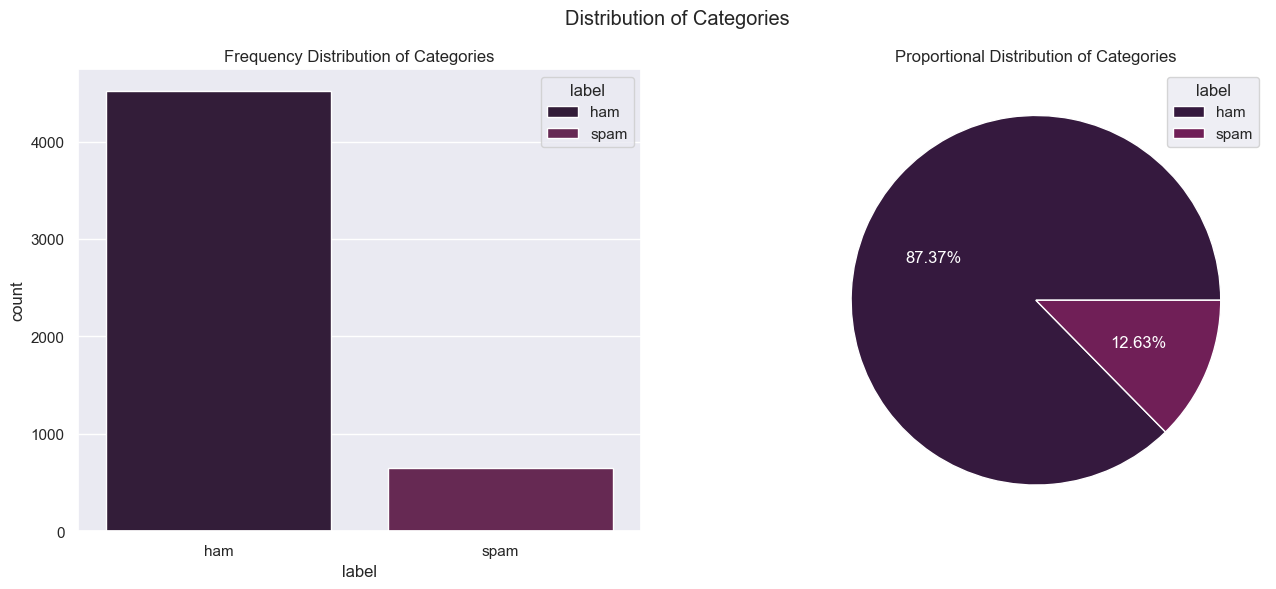

In [120]:
sns.set_theme(style="darkgrid", palette="rocket")

plt.figure(figsize=(16, 6))
plt.suptitle("Distribution of Categories")

plt.subplot(1, 2, 1)
plt.title("Frequency Distribution of Categories")
sns.countplot(data=messages, x="label", hue="label", legend="full")

distribution = messages["label"].value_counts()
plt.subplot(1, 2, 2)
plt.title("Proportional Distribution of Categories")
plt.pie(distribution, labels=distribution.index, autopct="%0.2f%%", textprops={"color": "#FFF"})
plt.legend(title="label")

plt.show()

In [7]:
messages["char_count"] = messages["message"].apply(len)
messages["word_count"] = messages["message"].apply(lambda x: len(nltk.word_tokenize(x)))
messages["sent_count"] = messages["message"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [8]:
messages.head()

,label,message,char_count,word_count,sent_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [9]:
messages[messages["label"] == "ham"].describe()

,char_count,word_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [10]:
messages[messages["label"] == "spam"].describe()

,char_count,word_count,sent_count
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


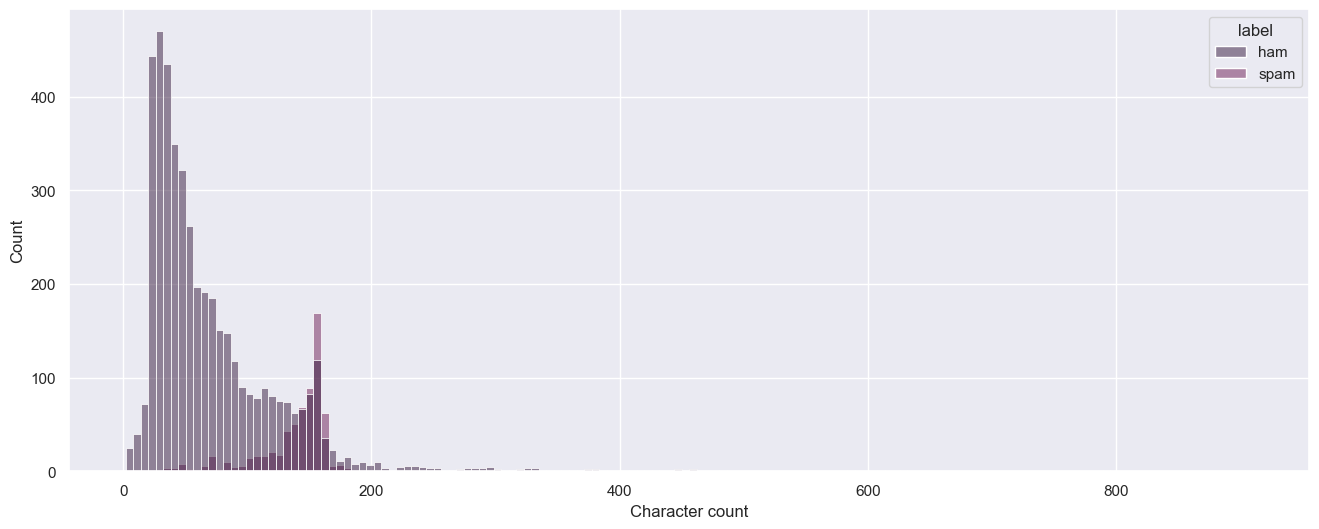

In [11]:
plt.figure(figsize=(16, 6))
sns.histplot(data=messages, x="char_count", bins=150, hue="label")
plt.xlabel("Character count")
plt.show()

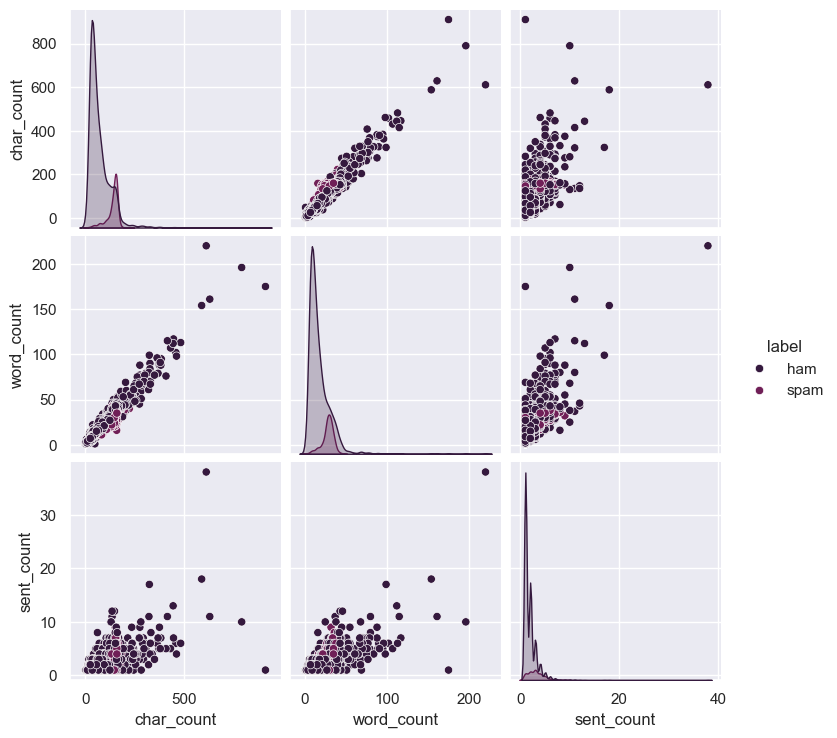

In [12]:
sns.pairplot(data=messages, hue="label")
plt.show()

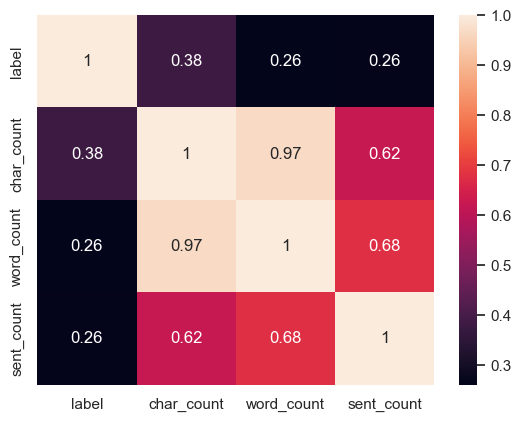

In [13]:
corr_dataframe = messages.copy().drop(columns=["message"])
corr_dataframe["label"] = corr_dataframe["label"].map({ "ham": 0, "spam": 1 })

sns.heatmap(corr_dataframe.corr(), annot=True)
plt.show()

# Data Preprocessing
- Conversion to lower case
- Removal of special characters and punctuation
- Tokenization
- Removal of stop words
- Stemming

In [14]:
def preprocess_messages(message):

    # converting to lower case
    message = message.lower()

    # removing special characters and punctuation
    message = "".join([char for char in message if char == " " or char.isalnum()])

    # tokenizing
    tokens = nltk.word_tokenize(message)

    # removing stop words
    eng_stopwords = stopwords.words("english")
    tokens = [token for token in tokens if token not in eng_stopwords]

    # stemming
    ps = PorterStemmer()
    tokens = [ps.stem(token) for token in tokens]

    return " ".join(tokens)

In [15]:
messages["transformed_message"] = messages["message"].apply(preprocess_messages)

In [16]:
messages.head(1)

,label,message,char_count,word_count,sent_count,transformed_message
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...


# Exploratory Data Analysis (Cont.)

In [109]:
spam_msgs_string = messages[messages["label"] == "spam"]["transformed_message"].str.cat(sep=" ")
ham_msgs_string = messages[messages["label"] == "ham"]["transformed_message"].str.cat(sep=" ")

### Visualizing Wordcloud

In [54]:
def show_wordcloud(string):
    word_cloud_obj = WordCloud(width=500, height=500, min_font_size=10)
    word_cloud = word_cloud_obj.generate(string)

    plt.figure(figsize=(16, 6))
    plt.grid(visible=False)
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.show()

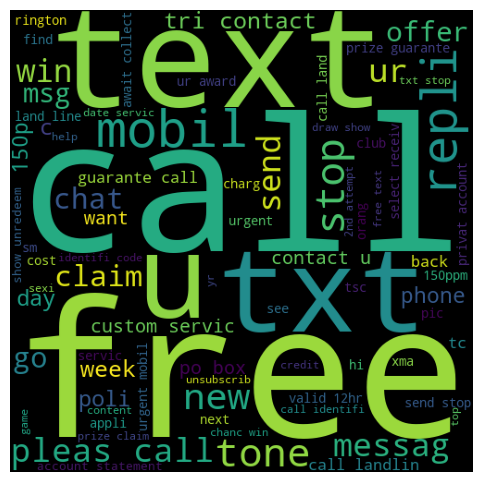

In [70]:
show_wordcloud(spam_msgs_string)

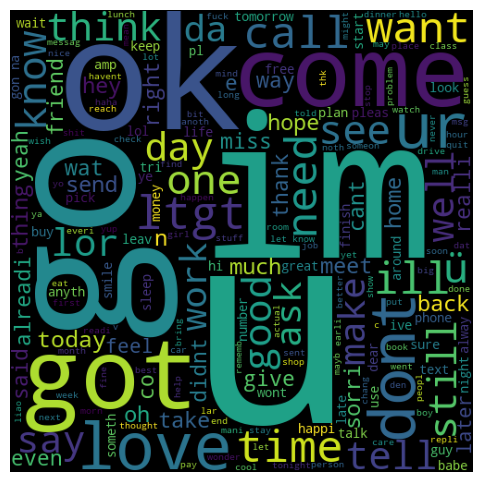

In [103]:
show_wordcloud(ham_msgs_string)

### Most frequent terms

In [140]:
def plot_most_frequent_words(most_common = 30):
    spam_word_count_dict = Counter(spam_msgs_string.split()).most_common(most_common)
    spam_word_freq_df = pd.DataFrame(spam_word_count_dict, columns=["word", "count"])

    ham_word_count_dict = Counter(ham_msgs_string.split()).most_common(most_common)
    ham_word_freq_df = pd.DataFrame(ham_word_count_dict, columns=["word", "count"])

    plt.figure(figsize=(16, 6))
    plt.suptitle("Frequent words")

    plt.subplot(1, 2, 1)
    plt.title("Frequent words in SPAM messages")
    sns.barplot(data=spam_word_freq_df, x="word", y="count", hue="word", palette="rocket")
    plt.xticks(rotation="vertical")


    plt.subplot(1, 2, 2)
    plt.title("Frequent words in HAM messages")
    sns.barplot(data=ham_word_freq_df, x="word", y="count", hue="word", palette="rocket")
    plt.xticks(rotation="vertical")

    plt.tight_layout(pad=2)
    plt.show()

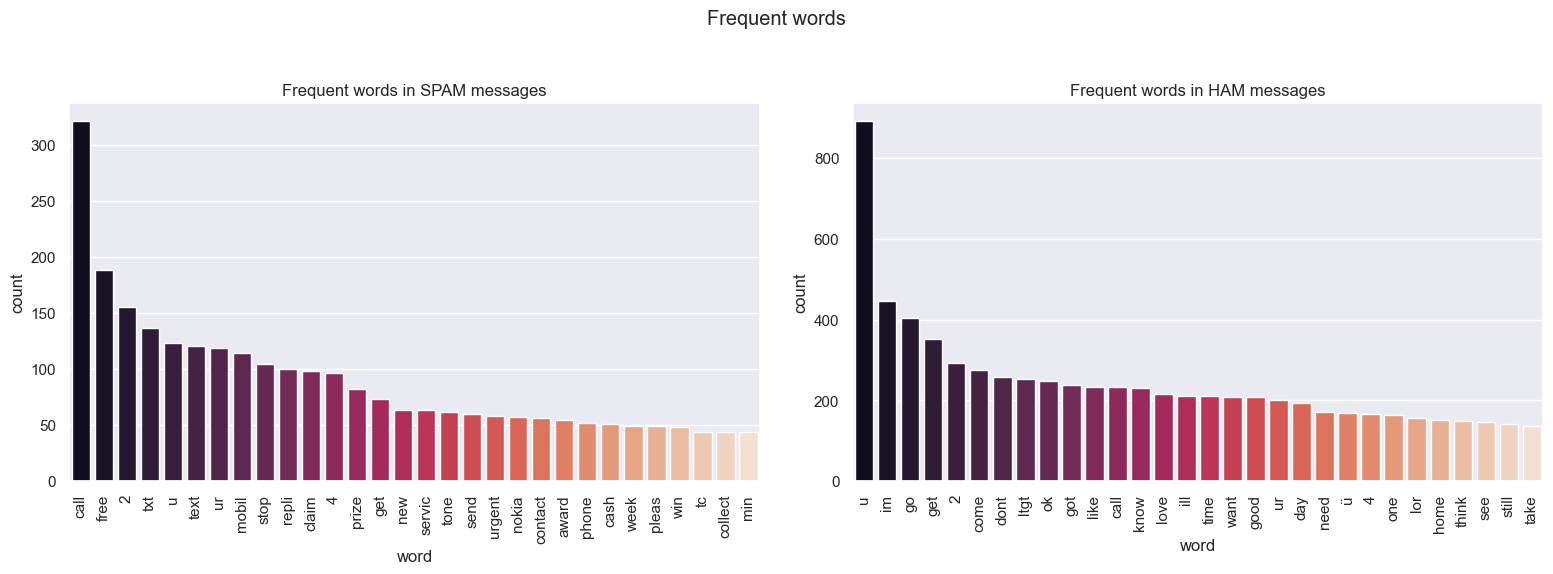

In [141]:
plot_most_frequent_words()

# Model training